<a href="https://colab.research.google.com/github/Josel099/Image-Classifier-With-KERAS/blob/main/ImageClassifier_with_Keras_(cat_dog).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Load dataset

In [6]:
X_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets /cnn:cat dog/ input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets /cnn:cat dog/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets /cnn:cat dog/ input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets /cnn:cat dog/labels_test.csv', delimiter = ',')

In [7]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0


In [8]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


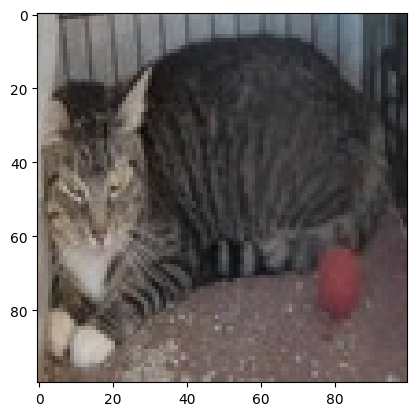

In [9]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

## CNN Model Implementation

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])


### Loss function

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Training

In [12]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 21s 636ms/step - loss: 0.7242 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 21s 670ms/step - loss: 0.6776 - accuracy: 0.5830
Epoch 3/5
32/32 [==============================] - 21s 655ms/step - loss: 0.6062 - accuracy: 0.6760
Epoch 4/5
32/32 [==============================] - 20s 628ms/step - loss: 0.5492 - accuracy: 0.7360
Epoch 5/5
32/32 [==============================] - 20s 638ms/step - loss: 0.4620 - accuracy: 0.7965


# Predictions

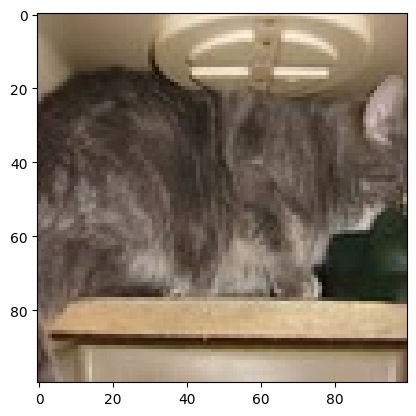

1/1 [==============================] - 0s 150ms/step
Our model says it is a : cat


In [13]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)
